## Calorie Prediction Through Nutritionals

Description: Nutritional values from the USDA National Nutrient database.

### Summary

[The dataset](https://data.world/awram/food-nutritional-values) is sourced from the Data World website.

| Metric                           | Value    | Explanation                                                 |
|----------------------------------|----------|-------------------------------------------------------------|
| Mean Absolute Error (MAE)        | 38.8046  | The average absolute difference between predicted values and actual values. A lower MAE indicates better prediction accuracy.                                                     |
| Mean Squared Error (MSE)         | 2521.5133| The average of the squared differences between predicted values and actual values. It penalizes large errors more than MAE. A lower MSE indicates better model performance.                    |
| Root Mean Squared Error (RMSE)   | 49.2961  | The square root of MSE. It provides a more interpretable measure of prediction errors in the same unit as the target variable. A lower RMSE is desirable.                    |
| R-squared (R2)                   | 0.9100   | Also known as the coefficient of determination, R2 represents the proportion of variance in the target variable that the model explains. Higher R2 values (closer to 1) indicate a better fit of the model to the data. |
| Root Mean Squared Log Error (RMSLE)| 0.5082 | RMSLE measures the ratio between the prediction error and the actual values on a logarithmic scale. Lower RMSLE suggests more accurate predictions for datasets with varying scales. |
| Mean Absolute Percentage Error (MAPE) | 0.5381| The average percentage difference between predicted values and actual values. It measures the magnitude of relative errors. A lower MAPE indicates better accuracy.         |
| Training Time (TT) in seconds    | 0.3830   | The amount of time taken to train the Passive Aggressive Regressor on the given data. Shorter training times are desirable as they imply faster model training.                |


### Importing Libraries

In [26]:
import pandas as pd
from pycaret.regression import *
from pycaret.regression import RegressionExperiment
import random

### Reading Dataset

In [19]:
# Read csv data
df = pd.read_excel("assets/input/food_nutrition.xlsx")

In [3]:
# Set the display option to show all columns
pd.set_option('display.max_columns', None)

# Display the count of null values in each column and all column names
null_counts = df.isnull().sum()
column_names = df.columns
null_info = pd.DataFrame({'Column Name': column_names, 'Null Count': null_counts})

# Reset the index to the default integer index
null_info.reset_index(drop=True, inplace=True)

# Replace all NaN values with 0
df.fillna(0, inplace=True)

### Regression Analysis

#### PyCaret

In [7]:
# Set up the regression experiment
s = RegressionExperiment()
s = setup(df, target = 'Energ_Kcal', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Energ_Kcal
2,Target type,Regression
3,Original data shape,"(8790, 53)"
4,Transformed data shape,"(8790, 53)"
5,Transformed train set shape,"(6153, 53)"
6,Transformed test set shape,"(2637, 53)"
7,Numeric features,49
8,Categorical features,3
9,Preprocess,True


In [14]:
best = s.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
par,Passive Aggressive Regressor,38.8046,2521.5133,49.2961,0.9100,0.5082,0.5381,0.3830
knn,K Neighbors Regressor,46.2887,6263.6120,78.8640,0.7762,0.5379,0.4734,0.5400
huber,Huber Regressor,80.6570,13200.9080,114.6704,0.5298,0.7587,1.0028,0.3480
et,Extra Trees Regressor,106.6158,16307.8680,127.6319,0.4175,0.9066,1.6380,0.4250
en,Elastic Net,114.0124,20482.6736,142.9948,0.2698,0.9657,1.8714,0.2590
ridge,Ridge Regression,133.1479,27956.4065,167.0661,0.0033,1.0499,2.1854,0.2360
lar,Least Angle Regression,133.1478,27956.9032,167.0675,0.0033,1.0499,2.1854,0.3620
br,Bayesian Ridge,133.1582,27960.7557,167.0790,0.0031,1.0500,2.1855,0.3660
lr,Linear Regression,133.1594,27961.2404,167.0805,0.0031,1.0500,2.1856,0.9000
gbr,Gradient Boosting Regressor,133.2570,28007.3721,167.2194,0.0014,1.0504,2.1876,0.3050


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [9]:
# Evaluate model
s.evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

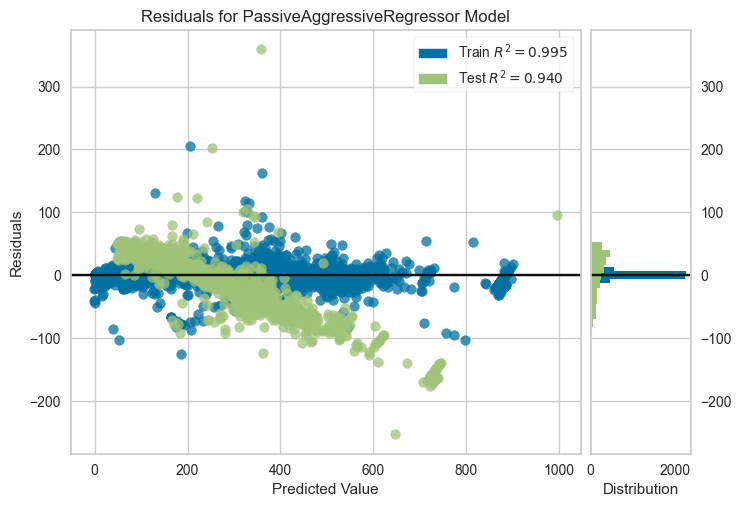

In [10]:
# Plot the best model
s.plot_model(best, plot = 'residuals')

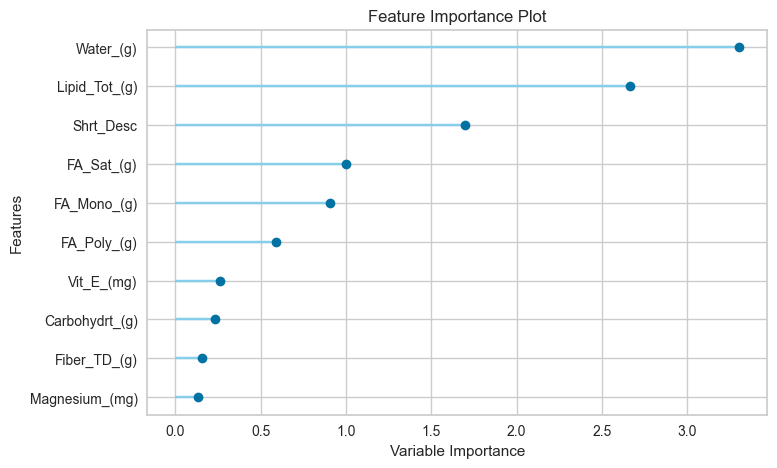

In [11]:
# Plot feature importance
s.plot_model(best, plot = 'feature')

In [12]:
# Prediction of the best model
s.predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Passive Aggressive Regressor,33.1358,1831.3313,42.7941,0.9402,0.5300,0.5313


,NDB_No,Shrt_Desc,Water_(g),Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),Calcium_(mg),...,FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct,Energ_Kcal,prediction_label
4575,15094,"SHAD,AMERICAN,RAW",68.190002,16.930000,13.770000,1.32,0.000000,0.0,0.000000,47.0,...,5.724,3.268,75.0,85.00,3 oz,184.0,1 fillet,0.0,197,204.420133
4825,16088,"PEANUTS,ALL TYPES,CKD,BLD,W/SALT",41.779999,13.500000,22.010000,1.45,21.260000,8.8,2.470000,55.0,...,10.921,6.956,0.0,63.00,"1 cup, in shell, edible yield",180.0,"1 cup, shelled",0.0,318,296.807423
506,3304,"BABYFOOD,DINNER,POTATOES W/CHS&HAM,TODD",81.500000,3.500000,2.000000,1.03,11.970000,1.2,0.800000,53.0,...,0.733,0.163,6.0,28.35,1 oz,0.0,0,0.0,78,111.595228
6143,19111,"CANDIES,NESTLE,BABY RUTH BAR",6.990000,5.400000,21.600000,1.21,64.800003,2.0,54.000000,47.0,...,5.557,2.638,0.0,60.00,"1 serving, 2.1 oz bar",18.0,"1 serving, fun size bar 0.65 oz",0.0,459,411.852217
6970,21491,"PIZZA HUT 14"" PEPPERONI PIZZA,THIN 'N CRISPY C...",33.570000,14.130000,16.170000,3.48,32.660000,2.1,2.790000,196.0,...,5.305,3.132,37.0,80.00,1 slice,634.0,1 pizza,0.0,333,308.613756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,1275,"YOGURT,GREEK,NONFAT,VANILLA,CHOBANI",82.029999,9.070000,0.220000,0.59,8.090000,0.3,7.610000,106.0,...,0.060,0.011,0.0,150.00,5.3 oz,0.0,0,0.0,71,105.985069
146,1167,"CHEESE,MEXICAN,QUESO CHIHUAHUA",39.130001,21.559999,29.680000,4.06,5.560000,0.0,5.560000,651.0,...,8.443,0.892,105.0,132.00,"1 cup, diced",113.0,"1 cup, shredded",0.0,374,343.537462
5941,18529,"ARCHWAY HOME STYLE COOKIES,FROSTY LEMON",12.030000,4.410000,17.110001,1.67,64.779999,0.7,33.349998,41.0,...,5.750,0.920,0.0,26.00,1 serving,0.0,0,0.0,430,380.906285
7503,23425,"BEEF,NZ,IMP,VAR MEATS & BY-PRODUCTS,LIVER,RAW",70.389999,20.500000,4.050000,1.46,3.600000,0.0,0.000000,4.0,...,0.464,0.880,254.0,113.00,4 oz,0.0,0,3.0,133,191.124653


In [16]:
# Apply the model to the input data and generate predictions
predictions = s.predict_model(best, data=df)
predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Passive Aggressive Regressor,14.2330,645.0257,25.3974,0.9776,0.3304,0.1939


,NDB_No,Shrt_Desc,Water_(g),Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),Calcium_(mg),...,FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct,Energ_Kcal,prediction_label
0,1001,"BUTTER,WITH SALT",15.870000,0.85,81.110001,2.11,0.06,0.0,0.06,24.0,...,21.021000,3.043,215.0,5.00,"1 pat, (1"" sq, 1/3"" high)",14.2,1 tbsp,0.0,717,723.042661
1,1002,"BUTTER,WHIPPED,W/ SALT",16.719999,0.49,78.300003,1.62,2.87,0.0,0.06,23.0,...,19.874001,3.331,225.0,3.80,"1 pat, (1"" sq, 1/3"" high)",9.4,1 tbsp,0.0,718,705.549903
2,1003,"BUTTER OIL,ANHYDROUS",0.240000,0.28,99.480003,0.00,0.00,0.0,0.00,4.0,...,28.732000,3.694,256.0,12.80,1 tbsp,205.0,1 cup,0.0,876,882.606158
3,1004,"CHEESE,BLUE",42.410000,21.40,28.740000,5.11,2.34,0.0,0.50,528.0,...,7.778000,0.800,75.0,28.35,1 oz,17.0,1 cubic inch,0.0,353,354.851382
4,1005,"CHEESE,BRICK",41.110001,23.24,29.680000,3.18,2.79,0.0,0.51,674.0,...,8.598000,0.784,94.0,132.00,"1 cup, diced",113.0,"1 cup, shredded",0.0,371,337.134851


In [40]:
# Update the apple_pie_data dictionary to include 'NDB_No' and 'Shrt_Desc': 'Apple Pie'
apple_pie_data = {
    'NDB_No': [13434],  # Add a'NDB_No'
    'Shrt_Desc': ['Apple Pie'],  # Add the 'Shrt_Desc' column with the value 'Apple Pie'
    'Water_(g)': [40.0],
    'Protein_(g)': [4.0],
    'Lipid_Tot_(g)': [15.0],
    'Ash_(g)': [2.0],
    'Carbohydrt_(g)': [40.0],
    'Fiber_TD_(g)': [5.0],
    'Sugar_Tot_(g)': [20.0],
    'Calcium_(mg)': [50],
    'Iron_(mg)': [1.5],
    'Magnesium_(mg)': [20],
    'Phosphorus_(mg)': [100],
    'Potassium_(mg)': [150],
    'Sodium_(mg)': [200],
    'Zinc_(mg)': [0.8],
    'Copper_mg)': [0.2],
    'Manganese_(mg)': [0.1],
    'Selenium_(µg)': [2.0],
    'Vit_C_(mg)': [5.0],
    'Thiamin_(mg)': [0.1],
    'Riboflavin_(mg)': [0.2],
    'Niacin_(mg)': [1.5],
    'Panto_Acid_mg)': [0.2],
    'Vit_B6_(mg)': [0.1],
    'Folate_Tot_(µg)': [20],
    'Folic_Acid_(µg)': [10],
    'Food_Folate_(µg)': [5.0],
    'Folate_DFE_(µg)': [25],
    'Choline_Tot_ (mg)': [10],
    'Vit_B12_(µg)': [0.1],
    'Vit_A_IU': [1000],
    'Vit_A_RAE': [300],
    'Retinol_(µg)': [100],
    'Alpha_Carot_(µg)': [50],
    'Beta_Carot_(µg)': [60],
    'Beta_Crypt_(µg)': [20],
    'Lycopene_(µg)': [0.0],
    'Lut+Zea_ (µg)': [20],
    'Vit_E_(mg)': [0.5],
    'Vit_D_µg': [0.0],
    'Vit_D_IU': [0],
    'Vit_K_(µg)': [5.0],
    'FA_Sat_(g)': [5.0],
    'FA_Mono_(g)': [8.0],
    'FA_Poly_(g)': [2.0],
    'Cholestrl_(mg)': [15],
    'GmWt_1': [100],
    'GmWt_Desc1': ["1 piece (100g)"],
    'GmWt_2': [50],
    'GmWt_Desc2': ["1 serving (50g)"],
    'Refuse_Pct': [5.0]
}

# Convert the input data to a DataFrame
input_data = pd.DataFrame(apple_pie_data)

# Apply the model to the input data and generate predictions
predictions = s.predict_model(best, data=input_data)

# Extract only the 'prediction_label' column from the predictions DataFrame
prediction_labels = predictions['prediction_label']

# Get the 'Shrt_Desc' value from the input_data DataFrame
shrt_desc_value = input_data['Shrt_Desc'][0]

# Print the prediction labels
print(f'{shrt_desc_value} calories: {prediction_labels.values[0]}')

Apple Pie calories: 287.9296756670306
